### Coarse Tip Clearance Test Objective


### Procedure
- Initiate sweep from 30-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Duct Inner Diameter   | Propeller Diameter | Static Tip Clearance | Clearance to Height Ratio (%) | Test Status |
|-                      |-                   |-                     |-                              |-            |
| 137 mm                | 5 in / 127 mm      | 5 mm                 | 71.4 %                        | Waiting     |
| 133 mm                | 5 in / 127 mm      | 3 mm                 | 42.9 %                        | Waiting     |
| 129 mm                | 5 in / 127 mm      | 1 mm                 | 14.3 %                        | Waiting     |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.
- We expect all three 3D printed ducts to consume more power and produce less thrust relative to an equivalent propeller in open air. This is because the tip clearance to blade height ratio is too high for the duct to prevent the formation of blade tip vortices. These vortices are trapped by the duct rather than diffusing into open air, resulting in additional power loss.  

In [315]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [316]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [317]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

### Execute Tests

In [318]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [320]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 484,0,0,18.101999,10.240000,0.087240,-0.208650,0.689246,0.000000

Rx: 5161,0,0,17.325001,10.240000,0.072700,-0.306020,0.689246,-0.000003

Rx: 9168,0,0,17.052000,10.240000,0.159940,-0.208650,0.689246,-0.000003

Rx: 13157,0,0,16.905001,10.240000,0.203560,-0.264290,0.689246,0.000000

Rx: 17164,0,0,16.863001,10.240000,0.174480,-0.278200,0.689246,0.000000

Rx: 21161,0,0,16.820999,10.240000,0.159940,-0.236470,0.689246,-0.000003

Rx: 25164,0,0,16.820999,10.240000,0.

In [334]:
test_directory = Path("../test_data/coarse_tip_clearance/")
data_dict = {}

In [351]:
data_dict["test_5in_6blade_1000um_0"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um_0.csv", plan=plan
)
data_dict["test_5in_6blade_1000um_1"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um_1.csv", plan=plan
)
data_dict["test_5in_6blade_1500um_0"] = test_run(
    filename=test_directory / "test_5in_6blade_1500um_0.csv", plan=plan
)
data_dict["test_5in_6blade_1500um_1"] = test_run(
    filename=test_directory / "test_5in_6blade_1500um_1.csv", plan=plan
)
data_dict["test_5in_6blade_3000um_0"] = test_run(
    filename=test_directory / "test_5in_6blade_3000um_0.csv", plan=plan
)
data_dict["test_5in_6blade_3000um_1"] = test_run(
    filename=test_directory / "test_5in_6blade_3000um_1.csv", plan=plan
)
data_dict["test_5in_6blade_open_air_recal_0"] = test_run(
    filename="../test_data/open_air/test_5in_6blade_open_air_recal_0.csv", plan=plan
)
data_dict["test_5in_6blade_open_air_recal_1"] = test_run(
    filename="../test_data/open_air/test_5in_6blade_open_air_recal_1.csv", plan=plan
)
data_dict["test_5in_6blade_open_air_shaved_0"] = test_run(
    filename="../test_data/open_air/test_5in_6blade_open_air_shaved_0.csv", plan=plan
)
data_dict["test_5in_6blade_open_air_shaved_1"] = test_run(
    filename="../test_data/open_air/test_5in_6blade_open_air_shaved_1.csv", plan=plan
)
data_dict["test_5in_6blade_open_air_shaved_low_soc"] = test_run(
    filename="../test_data/open_air/test_5in_6blade_open_air_shaved_low_soc.csv", plan=plan
)

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [336]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  \
test_name                               time_ms                    
test_5in_6blade_1000um                  0.476                0.0   
                                        5.162                0.0   
                                        9.165                0.0   
                                        13.164               0.0   
                                        17.161               0.0   
...                                                          ...   
test_5in_6blade_open_air_shaved_low_soc 41968.170         1528.0   
                                        41972.166         1500.0   
                                        41976.174         1442.0   
                                        41980.166         1385.0   
                                        41984.164         1342.0   

                                                   bottom_motor_rpm  \
test_name                               time_ms                       
test_5in_6blade_1000um                  0.476                   0.0   
                                        5.162                   0.0   
                                        9.165                   0.0   
                                        13.164                  0.0   
                                        17.161                  0.0   
...                                                             ...   
test_5in_6blade_open_air_shaved_low_soc 41968.170            1485.0   
                                        41972.166            1428.0   
                                        41976.174            1385.0   
                                        41980.166            1385.0   
                                        41984.164            1342.0   

                                                   batt_voltage_V  \
test_name                               time_ms                     
test_5in_6blade_1000um                  0.476           18.186001   
                                        5.162           17.304001   
                                        9.165           17.073000   
                                        13.164          16.947001   
                                        17.161          16.926001   
...                                                           ...   
test_5in_6blade_open_air_shaved_low_soc 41968.170       15.456000   
                                        41972.166       15.477000   
                                        41976.174       15.456000   
                                        41980.166       15.456000   
                                        41984.164       15.456000   

                                                   batt_current_A  \
test_name                               time_ms                     
test_5in_6blade_1000um                  0.476               10.24   
                                        5.162               10.24   
                                        9.165               10.24   
                                        13.164              10.24   
                                        17.161              10.24   
...                                                           ...   
test_5in_6blade_open_air_shaved_low_soc 41968.170           10.24   
                                        41972.166           10.24   
                                        41976.174           10.24   
                                        41980.166           10.24   
                                        41984.164           10.24   

                                                   top_current_A  \
test_name                               time_ms                    
test_5in_6blade_1000um                  0.476            0.14540   
                                        5.162            0.18902   
                                        9.165            0.14540   
                                        13.164           0.10178   
                                      

In [337]:
# Select single test to analyze closer
test_data = df_all.loc["test_5in_6blade_3000um_0"]
test_data

,top_motor_rpm,bottom_motor_rpm,batt_voltage_V,batt_current_A,top_current_A,bottom_current_A,thrust_N,torque_N
time_ms,,,,,,,,
0.488,0.0,0.0,18.080999,10.24,-0.04362,-0.20865,0.026024,0.000000
5.162,0.0,0.0,17.304001,10.24,0.24718,-0.18083,0.026024,-0.000003
9.179,0.0,0.0,17.052000,10.24,0.20356,-0.38948,0.026024,-0.000003
13.157,0.0,0.0,16.926001,10.24,0.02908,-0.31993,0.026024,0.000000
17.175,0.0,0.0,16.863001,10.24,0.07270,-0.20865,0.026516,0.000000
...,...,...,...,...,...,...,...,...
41965.157,1828.0,1742.0,16.023001,10.24,0.07270,-0.43121,3.322235,-0.000003
41969.161,1785.0,1728.0,16.023001,10.24,0.04362,-0.25038,2.992565,0.000000
41973.157,1685.0,1671.0,16.023001,10.24,-0.01454,-0.18083,2.992565,0.000000


In [338]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [339]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm              \
                                                          mean         std   
test_name                               throttle                             
test_5in_6blade_1000um                  5             1752.072   12.075183   
                                        10            3138.288   23.438655   
                                        15            4402.032   41.059646   
                                        20            5696.148   50.895101   
                                        25            6804.872   48.733927   
...                                                        ...         ...   
test_5in_6blade_open_air_shaved_low_soc 80           15582.944  111.837361   
                                        85           16160.320  121.757848   
                                        90           16697.148  107.464863   
                                        95           17180.708  119.060035   
                                        100          17555.292  119.711730   

                                                 bottom_motor_rpm              \
                                                             mean         std   
test_name                               throttle                                
test_5in_6blade_1000um                  5                1758.536   28.397224   
                                        10               3154.696   34.902900   
                                        15               4465.256   46.447778   
                                        20               5744.248   33.928973   
                                        25               6960.544   51.791132   
...                                                           ...         ...   
test_5in_6blade_open_air_shaved_low_soc 80              15318.144  113.801257   
                                        85              15841.872  106.948359   
                                        90              16388.648  111.942882   
                                        95              16893.636   85.836116   
                                        100             17308.940   81.436700   

                                                 batt_voltage_V            \
                                                           mean       std   
test_name                               throttle                            
test_5in_6blade_1000um                  5             16.866613  0.019083   
                                        10            16.846452  0.019091   
                                        15            16.823939  0.016413   
                                        20            16.788491  0.024246   
                                        25            16.724316  0.023424   
...                                                         ...       ...   
test_5in_6blade_open_air_shaved_low_soc 80            14.658756  0.042098   
                                        85            14.382564  0.033127   
                                        90            14.159208  0.035426   
                                        95            13.907376  0.030219   
                                        100           13.698972  0.026994   

                                                 batt_current_A            \
                                                           mean       std   
test_name                               throttle                            
test_5in_6blade_1000um                  5              10.24000  0.000000   
                                        10             10.24000  0.000000   
                                        15             10.24000  0.000000   
                                        20             10.24000  0.000000   
                                        25             10.24000  0.000000   
...                                                         ...       ...   
test_5in_6blade_open_air_shaved_low_soc 80       

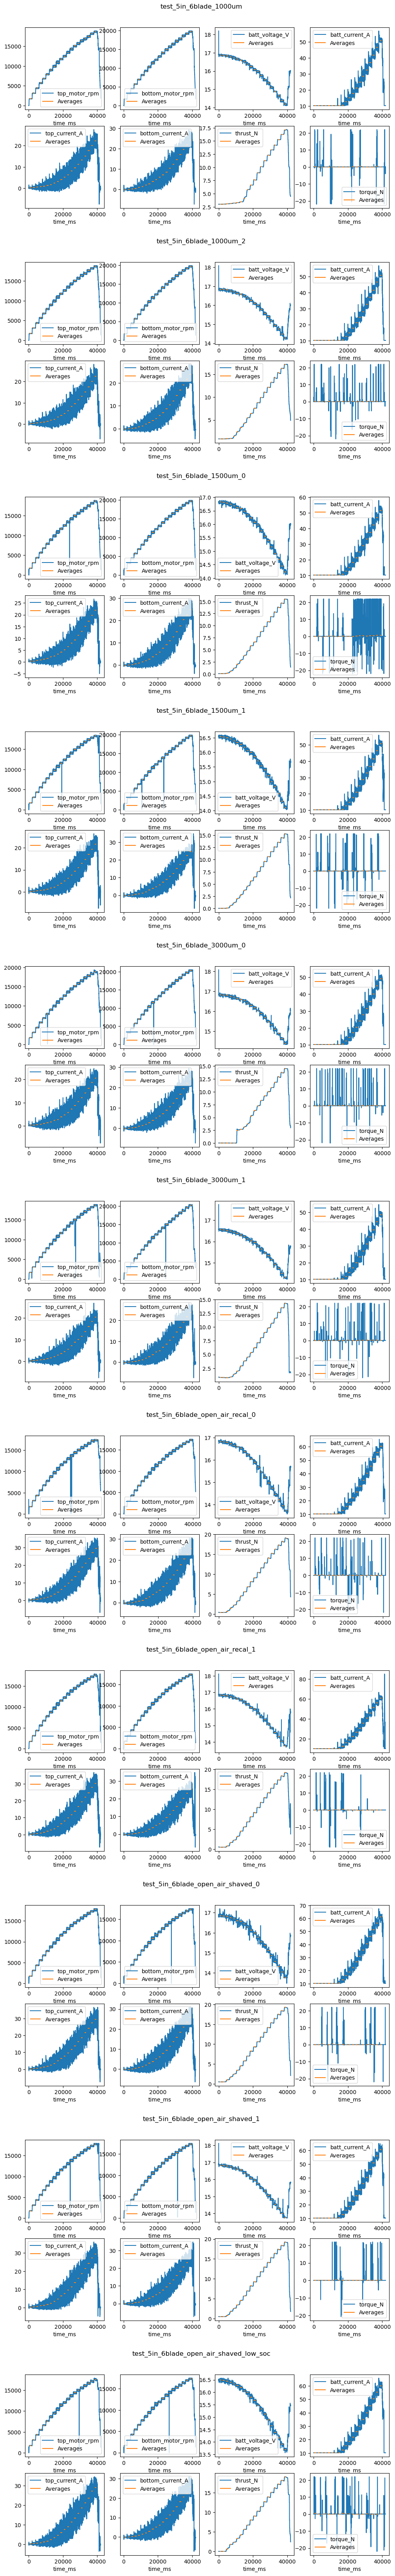

In [340]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [341]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = 5

hover_thrust_g = 750
payload_thrust_g = 1200

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

df_thrust_power = pd.DataFrame(
    {
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": batt_power_rel_err * batt_power_mean,
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

batt_power_rel_err

test_name                                throttle
test_5in_6blade_1000um                   5           6.757255
                                         10          1.216252
                                         15          0.598382
                                         20          0.359772
                                         25          0.225680
                                                       ...   
test_5in_6blade_open_air_shaved_low_soc  80          0.033889
                                         85          0.032476
                                         90          0.031444
                                         95          0.030518
                                         100         0.029805
Name: mean, Length: 220, dtype: float64

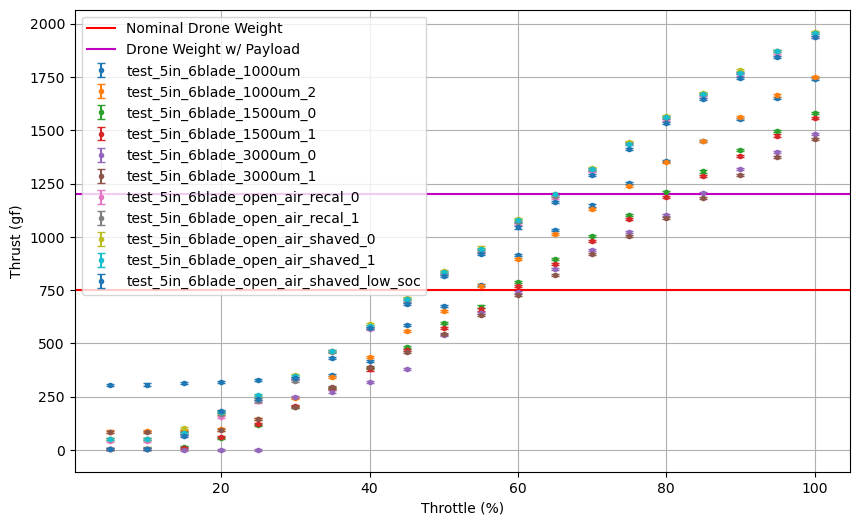

In [342]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
plt.axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
plt.legend()
plt.grid()
plt.show()

In [343]:
# TODO: nominal thrust-weight ratio plot
# thrust_mean_g.iloc[-1] / hover_thrust_g

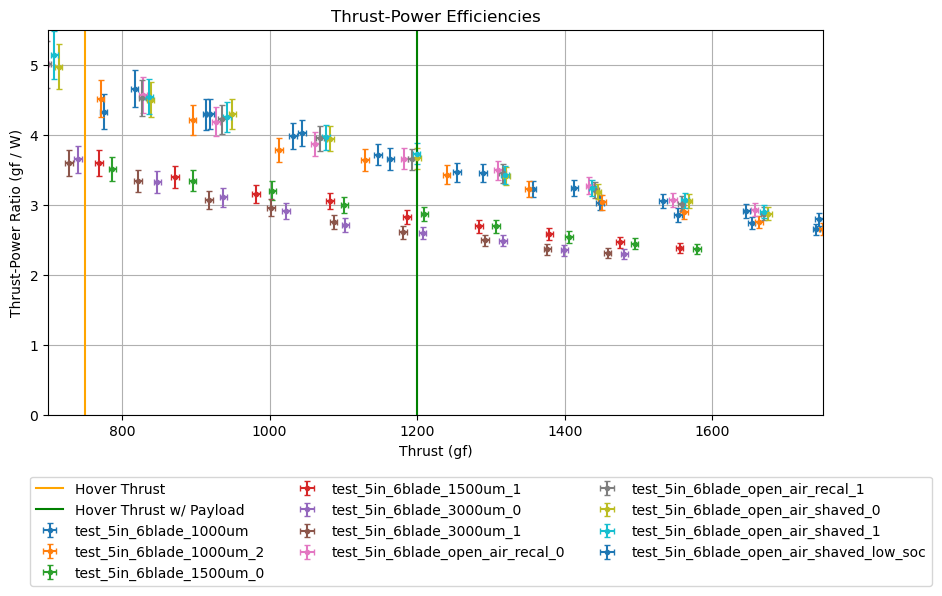

In [344]:
fig = plt.figure(figsize=(10, 5))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x="thrust_mean_g", y="thrust_power_g_W", xerr="thrust_g_err", yerr="thrust_power_err", data=grp, label=n, fmt='o', markersize=3, capsize=2)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.xlim(700, 1750)
plt.ylim(0,5.5)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

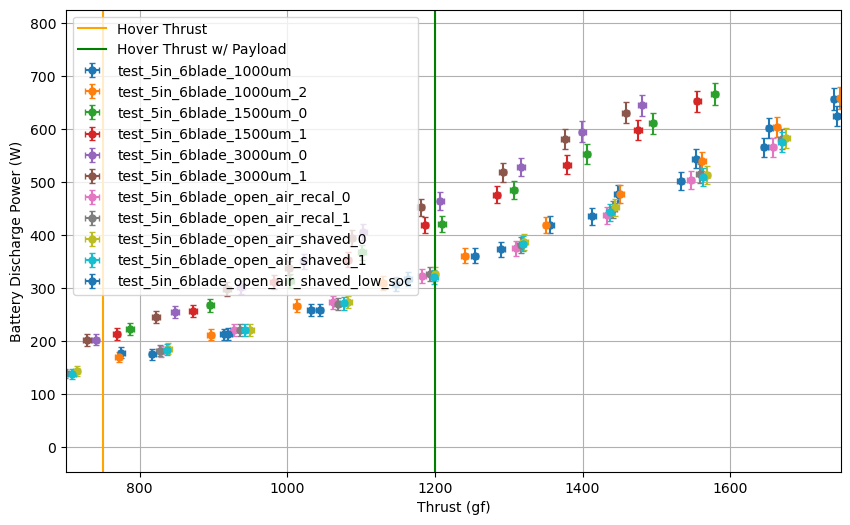

In [345]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    #plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
    plt.errorbar(x="thrust_mean_g", y="batt_power_mean", xerr="thrust_g_err", yerr="batt_power_err", label=n, data=grp, fmt='o', capsize=2, markersize=5)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.xlim(700, 1750)
plt.grid()
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [346]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle  \
test_name                               thrust_mean_g              
test_5in_6blade_1000um                  750.0          53.762078   
                                        1200.0         72.483014   
test_5in_6blade_1000um_2                750.0          54.113810   
                                        1200.0         73.191222   
test_5in_6blade_1500um_0                750.0          58.377699   
                                        1200.0         79.552445   
test_5in_6blade_1500um_1                750.0          59.142260   
                                        1200.0         80.710307   
test_5in_6blade_3000um_0                750.0          60.444620   
                                        1200.0         84.655074   
test_5in_6blade_3000um_1                750.0          61.158002   
                                        1200.0         85.867095   
test_5in_6blade_open_air_recal_0        750.0          47.023932   
                                        1200.0         65.690488   
test_5in_6blade_open_air_recal_1        750.0          46.995082   
                                        1200.0         65.282939   
test_5in_6blade_open_air_shaved_0       750.0          46.432866   
                                        1200.0         65.016299   
test_5in_6blade_open_air_shaved_1       750.0          46.622289   
                                        1200.0         65.029234   
test_5in_6blade_open_air_shaved_low_soc 750.0          47.461328   
                                        1200.0         66.450717   

                                                       batt_power_mean  \
test_name                               thrust_mean_g                    
test_5in_6blade_1000um                  750.0               169.829458   
                                        1200.0              335.068228   
test_5in_6blade_1000um_2                750.0               165.104814   
                                        1200.0              342.817005   
test_5in_6blade_1500um_0                750.0               207.911621   
                                        1200.0              416.852194   
test_5in_6blade_1500um_1                750.0               206.254562   
                                        1200.0              428.325247   
test_5in_6blade_3000um_0                750.0               207.690507   
                                        1200.0              460.823609   
test_5in_6blade_3000um_1                750.0               212.887600   
                                        1200.0              464.056814   
test_5in_6blade_open_air_recal_0        750.0               156.288065   
                                        1200.0              330.665422   
test_5in_6blade_open_air_recal_1        750.0               156.784806   
                                        1200.0              329.983106   
test_5in_6blade_open_air_shaved_0       750.0               155.888256   
                                        1200.0              327.396447   
test_5in_6blade_open_air_shaved_1       750.0               152.796386   
                                        1200.0              321.973234   
test_5in_6blade_open_air_shaved_low_soc 750.0               156.149033   
                                        1200.0              334.432785   

                                                       shunt_power_mean  \
test_name                               thrust_mean_g                     
test_5in_6blade_1000um                  750.0                233.567394   
                                        1200.0               410.825844   
test_5in_6blade_1000um_2                750.0                232.815045   
                                        1200.0               413.625631   
test_5in_6blade_1500um_0                750.0                274.732503   
                                        1200.0               497.889424   
test_5in_6blade_1500um_1                750.0 

In [347]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                                thrust_mean_g
test_5in_6blade_1000um                   750.0           0 days 00:08:53.335034214
                                         1200.0          0 days 00:04:30.321064106
test_5in_6blade_1000um_2                 750.0           0 days 00:09:08.596966399
                                         1200.0          0 days 00:04:24.210930914
test_5in_6blade_1500um_0                 750.0           0 days 00:07:15.646643882
                                         1200.0          0 days 00:03:37.285650306
test_5in_6blade_1500um_1                 750.0           0 days 00:07:19.146651078
                                         1200.0          0 days 00:03:31.465470646
test_5in_6blade_3000um_0                 750.0           0 days 00:07:16.110447546
                                         1200.0          0 days 00:03:16.552429700
test_5in_6blade_3000um_1                 750.0           0 days 00:07:05.463954206
                                

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

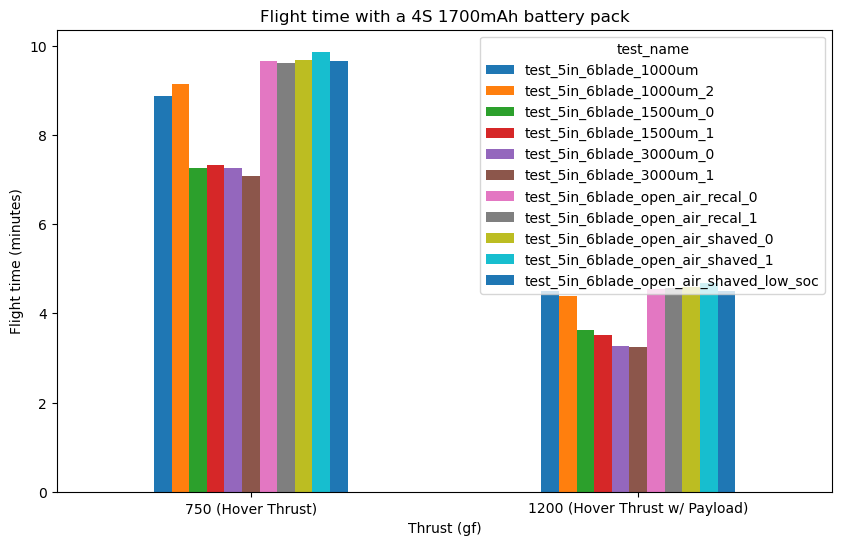

In [350]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
    figsize=(10, 6)
)